ValueError: x and y must have same first dimension, but have shapes (500,) and (124,)

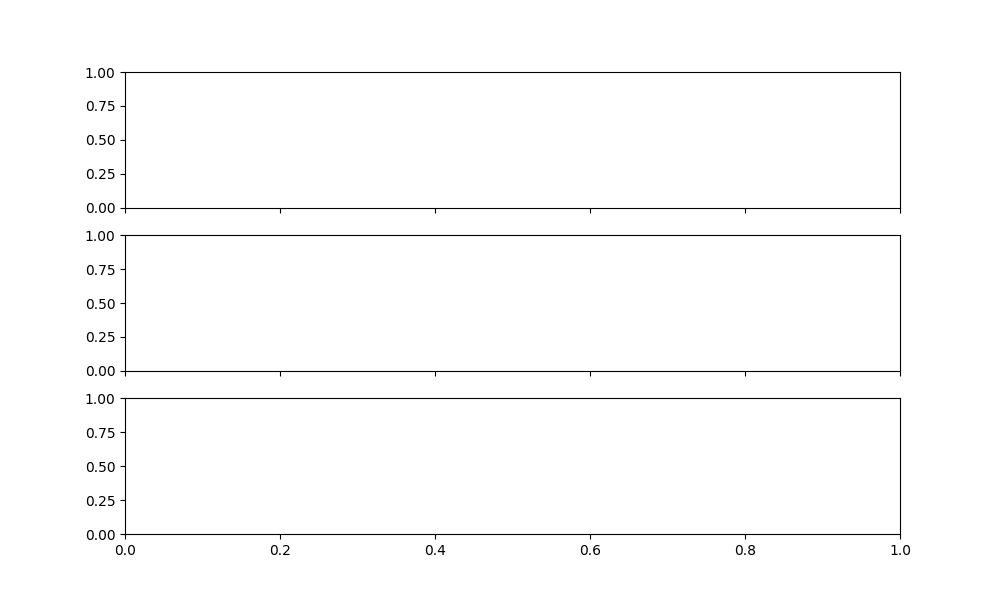

In [101]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget


T1 = 0.00025 #0.035 m / 140 rad from TSA test
T2 = 10 #guess for leg movement/string contract
m_a = 1/2 * 0.020 * 0.010**2 #cylinder MOI 20g 10mm radius
m_l = 0.5 #mass to push off ground
k = 3000 # no idea honestly

tau_max = 0.05 #N*m stall torque
omega_max = 3000 #about 10,000rpm free speed

c1 = -k * T1**2 * omega_max / tau_max
c2 = k * T1 * omega_max / (tau_max * T2)
c3 = k * T1 / (T2 * m_l)
c4 = -k / (T2**2 * m_l)


# Xdot = A*X where X = [x_a, x_l, x_l_dot]
A = np.array([
    [c1, c2, 0],
    [0, 0, 1],
    [c3, c4, 0],
])
b = [omega_max, 0, 0]


def f(X):
    X = np.array(X).reshape(3)
    return A@X + b

def RK4(f, X, dt):
    # Runge-Kutta 4 integration
    k1 = f(X)
    k2 = f(X + (dt/2)*k1)
    k3 = f(X + (dt/2)*k2)
    k4 = f(X + dt*k3)
    return X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

X = np.array([0, 0, 0])
log = []

dt = 0.001
times = []
for ti in np.arange(0, 0.5, dt):
    X = RK4(f, X, dt)
    times.append(ti)
    log.append(X)

    if(X[1] > 0.1 or X[2] < 0):
        break

log = np.array(log)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,6))
axs[0].plot(times, log[:,0], label=f'x_a {dt}')

axs[0].plot(times, np.gradient(log[:,0])/dt, label=f'x_a_dot {dt}')

axs[1].plot(times, log[:,1], label=f'x_l {dt}')
axs[2].plot(times, log[:,2], label=f'x_l_dot {dt}')

for ax in axs:
    ax.legend()
plt.show()

In [89]:
X = np.array([0, 0, 0])
log = []

dt = 0.01
times = np.arange(0, 1, dt)
for ti in times:
    X = RK4(f, X, dt)
    # print(X)
    log.append(X)

log = np.array(log)

axs[0].plot(times, log[:,0], label=f'x_a {dt}')
axs[1].plot(times, log[:,1], label=f'x_l {dt}')
axs[2].plot(times, log[:,2], label=f'x_l_dot {dt}')

for ax in axs:
    ax.legend()